In [1]:


# ________________Manipulation_____________
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from itertools import product
import matplotlib.pyplot as plt
import joblib as jl
import os
#___________________ACF___________________
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
#__________________Importing data ____________________
df_sales_train1=jl.load("C:/Users/LENOVO/Desktop/Sales Forecasing/data/processed/df_sales_train1.pkl")
df_sales_train1

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,week_id,Revenue
0,2013-01-02,0,59,22154,999.0,1.0,"Yaroslavl TC"" Altair """,SCENE 2012 (BD),37,Cinema - Blu-Ray,2013-W00,999.0
25918,2013-01-02,0,25,22154,999.0,1.0,"Moscow TEC"" Atrium """,SCENE 2012 (BD),37,Cinema - Blu-Ray,2013-W00,999.0
25919,2013-01-03,0,25,22154,999.0,1.0,"Moscow TEC"" Atrium """,SCENE 2012 (BD),37,Cinema - Blu-Ray,2013-W00,999.0
25920,2013-01-20,0,25,22154,999.0,1.0,"Moscow TEC"" Atrium """,SCENE 2012 (BD),37,Cinema - Blu-Ray,2013-W03,999.0
25921,2013-01-23,0,25,22154,999.0,1.0,"Moscow TEC"" Atrium """,SCENE 2012 (BD),37,Cinema - Blu-Ray,2013-W03,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2896869,2015-10-22,33,55,13093,250.0,1.0,Digital warehouse 1C-Online,Windows payment card: 250 rubles [Digital vers...,36,Payment cards - Windows (Digital),2015-W42,250.0
2851121,2015-09-21,32,55,13091,1000.0,1.0,Digital warehouse 1C-Online,Windows payment card: 1000 rubles [Digital ver...,36,Payment cards - Windows (Digital),2015-W38,1000.0
2851125,2015-09-16,32,55,13094,2500.0,1.0,Digital warehouse 1C-Online,Windows payment card: 2500 rubles [Digital ver...,36,Payment cards - Windows (Digital),2015-W37,2500.0
2851126,2015-09-22,32,55,13094,2500.0,2.0,Digital warehouse 1C-Online,Windows payment card: 2500 rubles [Digital ver...,36,Payment cards - Windows (Digital),2015-W38,5000.0


In [4]:
df_sales_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928492 entries, 0 to 2896865
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   shop_name           object        
 7   item_name           object        
 8   item_category_id    int64         
 9   item_category_name  object        
 10  week_id             object        
 11  Revenue             float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 290.5+ MB


In [5]:
df_sales_train1.describe().T

,count,mean,min,25%,50%,75%,max,std
date,2928492,2014-04-03 05:39:54.114103040,2013-01-01 00:00:00,2013-08-01 00:00:00,2014-03-04 00:00:00,2014-12-05 00:00:00,2015-10-31 00:00:00,NaN
date_block_num,2928492.0,14.569763,0.0,7.0,14.0,23.0,33.0,9.422951
shop_id,2928492.0,33.002952,0.0,22.0,31.0,47.0,59.0,16.225429
item_id,2928492.0,10200.281967,0.0,4477.0,9355.0,15691.0,22169.0,6324.395925
item_price,2928492.0,889.466751,0.07,249.0,399.0,999.0,307980.0,1727.498582
item_cnt_day,2928492.0,1.248337,1.0,1.0,1.0,1.0,2169.0,2.619586
item_category_id,2928492.0,40.016362,0.0,28.0,40.0,55.0,83.0,17.098111
Revenue,2928492.0,1164.372665,0.07,249.0,449.0,1090.0,1829990.000001,5687.671452


# Product based analysis

In [6]:
df_prod = df_sales_train1.groupby(
    ["week_id", "item_category_id"], as_index=False
).agg(
    {
        "date": "first",
        "item_cnt_day": "sum",
    }
)

categories = df_prod["item_category_id"].unique()
for cat in categories:
    df1 = df_prod[df_prod["item_category_id"] == cat]
    df1_grouped = (
        df1.groupby("week_id")
        .agg(
            {
                "date": "first",
                "item_cnt_day": "sum",
                "item_category_id": "first",
            }
        )
        .reset_index()
    )

    df1_grouped = df1_grouped.sort_values(by="date", ascending=True)
    fig = px.line(
        df1_grouped,
        x="week_id",
        y="item_cnt_day",
        labels={
            "x": "week_id",
            "y": "item_cnt_day",
        },
        title=f"Qty sold (All shops) of product category {cat}",
        hover_data={"item_category_id": True},
    )
    fig.update_layout(
        xaxis_tickangle=90,
    )
    fig.show()

In [8]:


total_sales=df_sales_train1.groupby('week_id',as_index=False).agg({
    'date':'first',
    'item_price':'sum',
    'item_cnt_day':'sum',   
    'Revenue':'sum',
    'item_id':'count'
})
total_sales.head(3)
fig=px.line(x=total_sales['date'],y=total_sales['Revenue'],
            labels={
                'x':'Date',
                'y':'Weekly Revenue'
            },
            title='Total sales per week (ALL Stores)')
fig.update_layout(
    width=800,
    #height=1000
)

fig.show()


c:\Users\LENOVO\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [9]:

fig=px.line(x=total_sales['date'],y=total_sales['item_cnt_day'],
            labels={
                'x':'Date',
                'y':'Weekly quantity'
            }
            ,title='Total quantity sold per week (All Stores)')
fig.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Per Shop 

In [10]:
plot_data = df_sales_train1.groupby("shop_id", as_index=False).agg(
    {"item_id": "count", "item_cnt_day": "sum", "Revenue": "sum"}
)

In [11]:
sorted_plot_data=plot_data.sort_values(by='item_id',ascending=False).reset_index(drop=True)
fig=px.bar(sorted_plot_data,x=sorted_plot_data.index,y='item_id',
           hover_data={'shop_id':True},
           title='Nbr of distinct items sold per shop ')

fig.update_layout(
    title_font_size=30,
    xaxis_title='Shops',
    yaxis_title='Nbr sold Items per shop',
    xaxis_tickangle=-90,  
    width=1000,  
    height=500, 
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)


fig.show()
plot_data.head(3)

,shop_id,item_id,item_cnt_day,Revenue
0,0,9857,11705.0,6.637370e+06
1,1,5678,6311.0,3.238207e+06
2,2,25911,30706.0,4.421349e+07


In [18]:
sorted_plot_data=plot_data.sort_values(by='item_cnt_day', ascending=False).reset_index(drop=True)
fig=px.bar(sorted_plot_data,x=sorted_plot_data.index,y='item_cnt_day',
           hover_data={'shop_id':True,'item_cnt_day':True},
           title='Qty sold per shop')
fig.update_layout(
    xaxis_title='Shop',
    yaxis_title='Qty sold per shop',
    xaxis_tickangle=-90
)
fig.show()

In [19]:

sorted_plot_data=plot_data.sort_values(by='Revenue',ascending=False).reset_index(drop=True)
fig=px.bar(sorted_plot_data,x=sorted_plot_data.index,y='Revenue',
           hover_data={'shop_id':True},title='Total revenue per shop')
fig.update_layout(
    xaxis_title='shop',
    yaxis_title='Total Revenue per shop',
    xaxis_tickangle=90,
    #xaxis={'categoryorder': 'total descending'},
)
fig.show()

Select only the TOP 5 stores ( in qty sold, in Revenue) ==> stores(31, 25, 28, 42, and 54)

There are product categories that aren't sold or barely at the end of the study period. These will be taken out

## Per Shop per week

In [12]:
df_top_shop = df_sales_train1[
    df_sales_train1["shop_id"].isin([31, 25, 28, 42, 54])
]

In [13]:
df_stillSold_categories = df_top_shop[
    df_top_shop["item_category_id"].isin(
        [
            3,
            19,
            21,
            22,
            23,
            25,
            28,
            29,
            30,
            33,
            35,
            37,
            38,
            40,
            55,
            43,
            49,
            56,
            57,
            58,
            61,
            63,
            64,
            65,
            67,
            69,
            70,
            71,
            72,
            73,
            75,
            79,
            62,
            9,
            31,
            54,
            20,
            8,
            24,
            42,
        ]
    )
]

In [14]:
all_shops_data = []

# Step 2: Loop through each shop and calculate weekly sales
for shop in df_stillSold_categories["shop_id"].unique():
    shop_data = df_stillSold_categories[
        df_stillSold_categories["shop_id"] == shop
    ]
    # weekly_sales = shop_data.groupby('week_id')['item_cnt_day'].sum().reset_index()
    weekly_sales = shop_data.groupby("week_id", as_index=False).agg(
        {
            "date": "first",
            "item_cnt_day": "sum",
            "item_price": "sum",
            "Revenue": "sum",
        }
    )
    weekly_sales["shop_id"] = shop
    all_shops_data.append(weekly_sales)

# Step 3: Concatenate all into a single DataFrame
plot_data = pd.concat(all_shops_data)

# Step 4: Optional - fix ordering of week_id if needed
plot_data["week_id"] = pd.Categorical(
    plot_data["week_id"],
    ordered=True,
    categories=sorted(plot_data["week_id"].unique()),
)

for shop in plot_data["shop_id"].unique():
    shop_df = plot_data[plot_data["shop_id"] == shop]
    fig = px.line(
        shop_df,
        x="week_id",
        y="item_cnt_day",
        # color='shop_id',
        title=f"Weekly quantity sold per Shop{shop}",
        labels={
            "week_id": "Week",
            "item_cnt_day": "Nbr of Items Sold",
            #'shop_id': 'Shop'
        },
    )
    fig.update_xaxes(type="category")
    fig.show()

Shop 54 doesn't stay open until the end of the period ==> No need to forecast for this shop

In [23]:
shops = df_stillSold_categories["shop_id"].unique()
for shop in shops:
    df_shop = df_stillSold_categories[
        df_stillSold_categories["shop_id"] == shop
    ]
    df_plot = (
        df_shop.groupby("item_category_id", as_index=False)
        .agg(
            {
                "item_category_name": "first",
                "item_cnt_day": "sum",
                "Revenue": "sum",
            }
        )
        .sort_values(by="item_cnt_day", ascending=True)
    )
    fig = px.bar(
        df_plot,
        x=df_plot["item_category_name"],
        y=df_plot["item_cnt_day"],
        title=f"Nbr of sold item for the shop {shop}",
        hover_data={"item_category_id": True},
    )
    fig.show()

Fore time series forecasting, one has to take into account the lag effect

To determine upo to which lag one has to concider == > ACF and PACF

ACF And PACF

Purpose of Lag Variables

If a product sold well in the past few weeks, it’s more likely to continue selling well (momentum, popularity, demand trend).

Conversely, sharp drops may indicate lost interest or stockout.

Lag variables are past values of a time series (e.g., sales in previous weeks) used as features to predict future values. In retail sales forecasting, lags are crucial because:

Sales Have Temporal Dependencies: Sales this week are often correlated with sales in recent weeks due to factors like seasonality, promotions, or recurring customer behavior.

Capture Trends and Seasonality: Lags help models learn patterns like weekly, monthly, or yearly seasonality (e.g., higher sales every December).

Autocorrelation: Sales data is often autocorrelated-past sales influence future sales, even if you’re not forecasting production.

The idea here is to create different lags, and at the end decide wich ones to include in the model based on the correlation , or other feature selection method


**How many lags to compute?**

===> PACF 


In [15]:
df_top_shop = df_stillSold_categories[
    (df_stillSold_categories["shop_id"].isin([31, 25, 28, 42]))
   
]
df_top_shop = df_top_shop[
    (df_top_shop["item_category_id"].isin([40, 30, 55, 23]))
]
df_top_shop.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,week_id,Revenue
25905,2013-01-02,0,25,22151,399.0,5.0,"Moscow TEC"" Atrium """,SCENE (2012),40,Cinema - DVD,2013-W00,1995.0
25906,2013-01-03,0,25,22151,399.0,3.0,"Moscow TEC"" Atrium """,SCENE (2012),40,Cinema - DVD,2013-W00,1197.0
25907,2013-01-06,0,25,22151,399.0,1.0,"Moscow TEC"" Atrium """,SCENE (2012),40,Cinema - DVD,2013-W01,399.0
25908,2013-01-07,0,25,22151,399.0,2.0,"Moscow TEC"" Atrium """,SCENE (2012),40,Cinema - DVD,2013-W01,798.0
25909,2013-01-10,0,25,22151,399.0,1.0,"Moscow TEC"" Atrium """,SCENE (2012),40,Cinema - DVD,2013-W01,399.0


In [16]:
df_final = df_top_shop.groupby(
    ["week_id", "shop_id", "item_category_id"], as_index=False
).agg(
    {
        "date": "first",
        "item_category_name": "first",
        "item_cnt_day": "sum",
        "item_price": "mean",
        "Revenue": "sum",
    }
)
df_final = df_final.sort_values(
    by=["week_id", "shop_id", "item_category_id"], ascending=True
)  # .reset_index(drop=False)
df_final

,week_id,shop_id,item_category_id,date,item_category_name,item_cnt_day,item_price,Revenue
0,2013-W00,25,23,2013-01-05,Games - XBOX 360,53.0,1952.737500,106697.0
1,2013-W00,25,30,2013-01-03,PC Games - Standard Editions,198.0,454.997792,92870.5
2,2013-W00,25,40,2013-01-02,Cinema - DVD,520.0,250.888889,144028.0
3,2013-W00,25,55,2013-01-02,Music - CD of local production,145.0,302.689394,43942.0
4,2013-W00,28,23,2013-01-04,Games - XBOX 360,62.0,1897.600340,118336.5
...,...,...,...,...,...,...,...,...
2395,2015-W43,31,55,2015-10-25,Music - CD of local production,164.0,310.751553,50738.0
2396,2015-W43,42,23,2015-10-25,Games - XBOX 360,25.0,1509.541667,38678.0
2397,2015-W43,42,30,2015-10-26,PC Games - Standard Editions,45.0,516.973684,21283.0
2398,2015-W43,42,40,2015-10-26,Cinema - DVD,94.0,281.813187,26992.0


In [17]:
shops = df_final["shop_id"].unique()
categories = df_final["item_category_id"].unique()
for shop, cat in product(shops, categories):
    df_plt = df_final[
        (df_final["shop_id"] == shop) & (df_final["item_category_id"] == cat)
    ].copy()
    if df_plt.empty:
        continue
    ts = (
        df_plt.groupby("week_id", as_index=False)
        .agg(
            {
                "date": "first",
                "Revenue": "sum",
            }
        )
        .sort_values(by="week_id")
    )
    acf_values = acf(ts["Revenue"], nlags=20, fft=False)
    fig = px.bar(
        x=np.arange(1, len(acf_values)),
        y=acf_values[1:],
        title=f"ACF - Revenue shop {shop} cat : {cat}",
    )  # .strip()
    fig.add_hline(y=0, line_color="black")
    fig.add_hline(y=0.2, line_color="red", line_dash="dash")
    fig.add_hline(y=-0.2, line_color="red", line_dash="dash")
    fig.show()

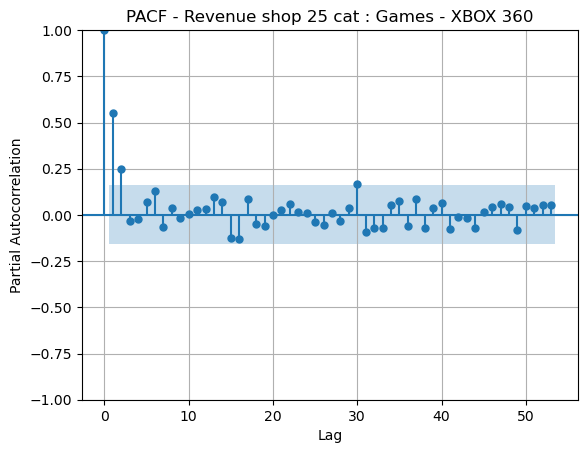

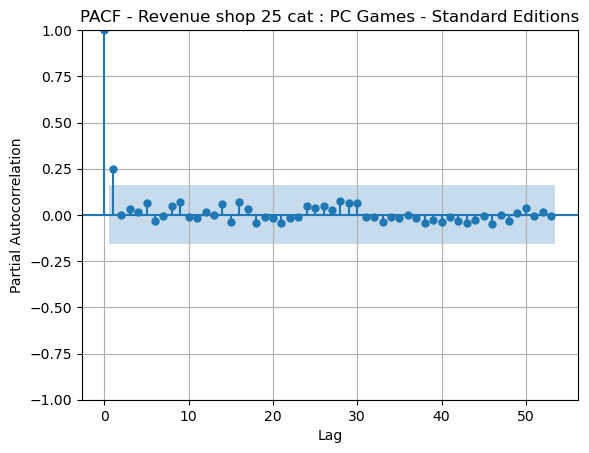

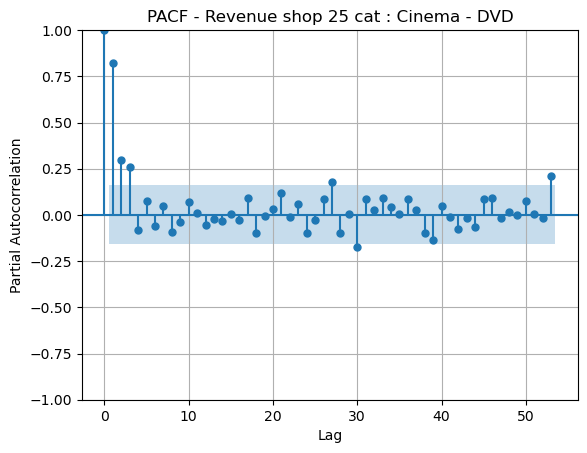

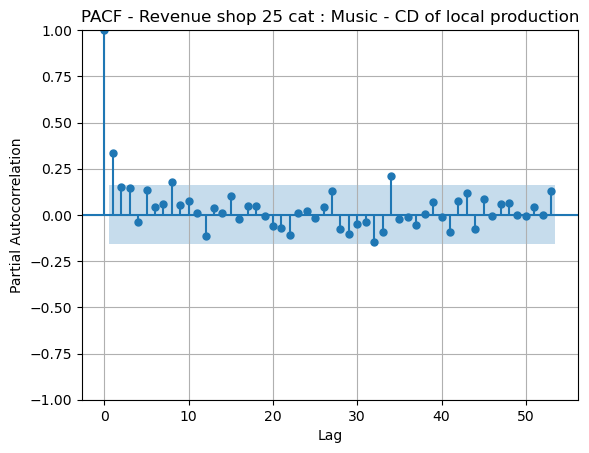

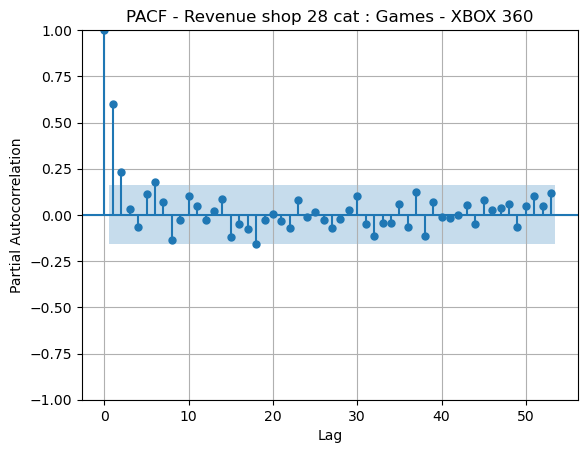

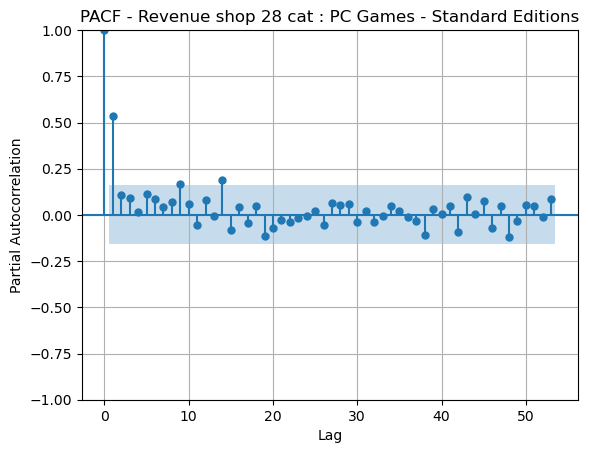

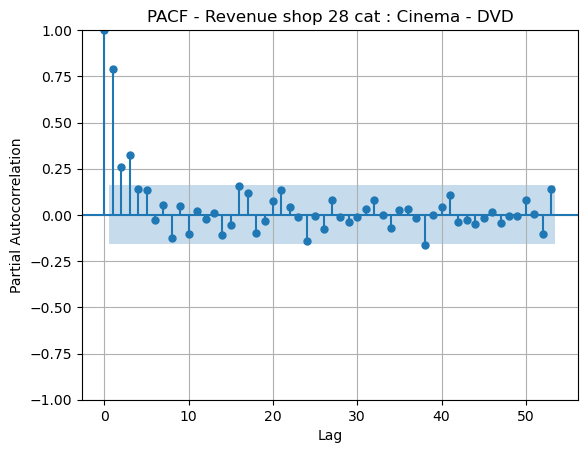

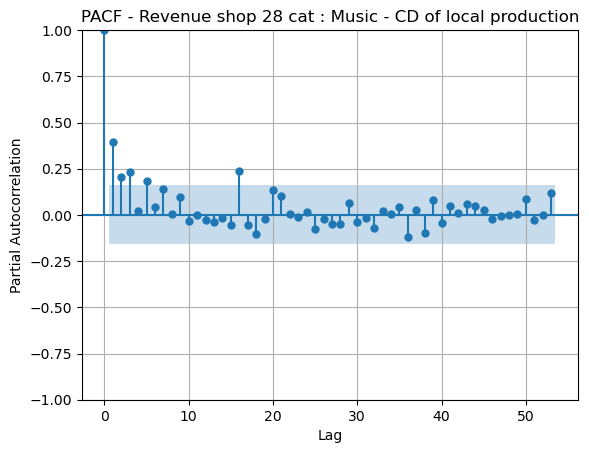

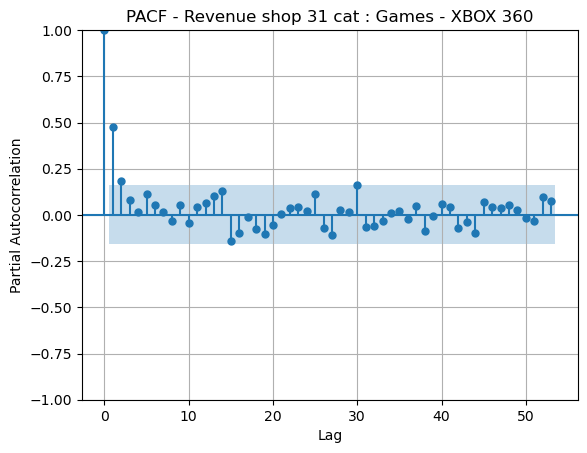

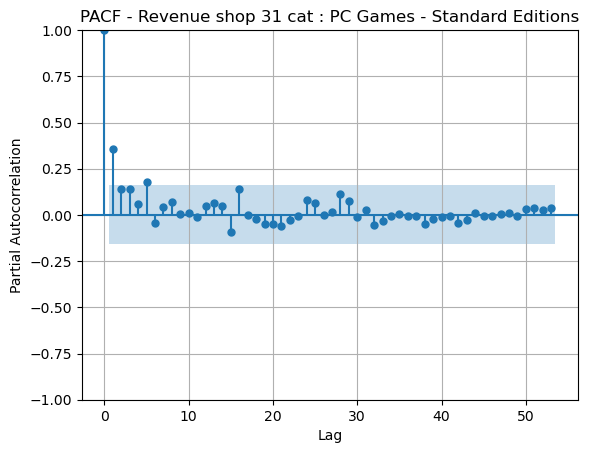

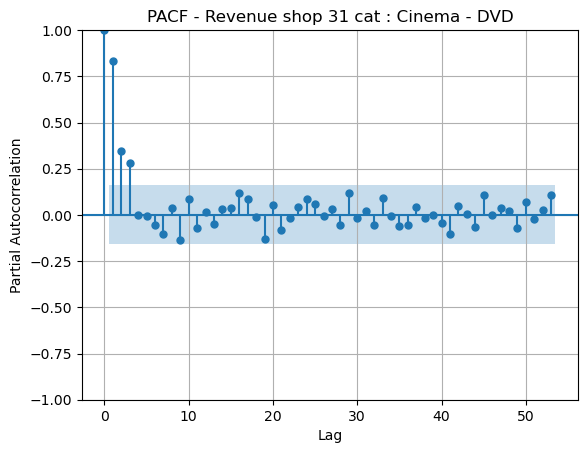

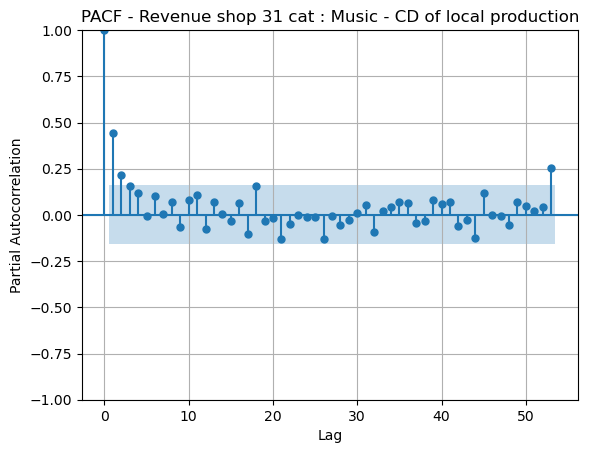

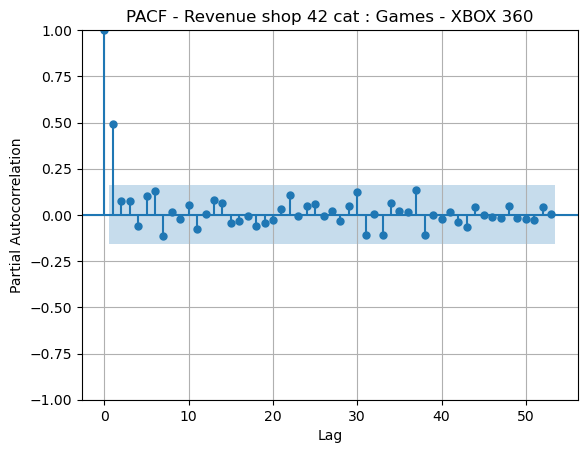

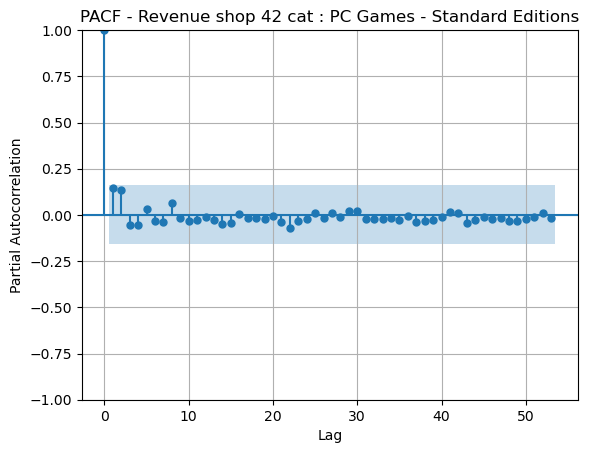

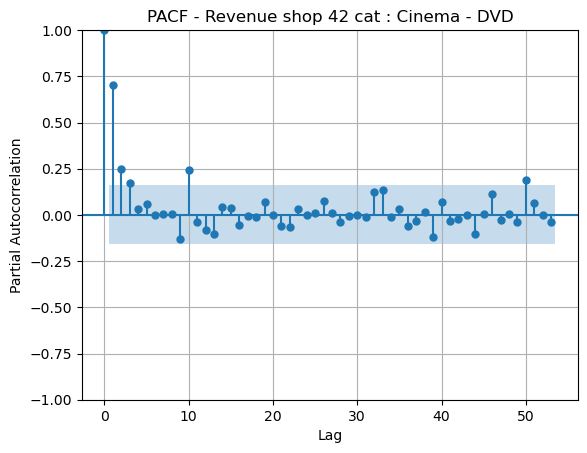

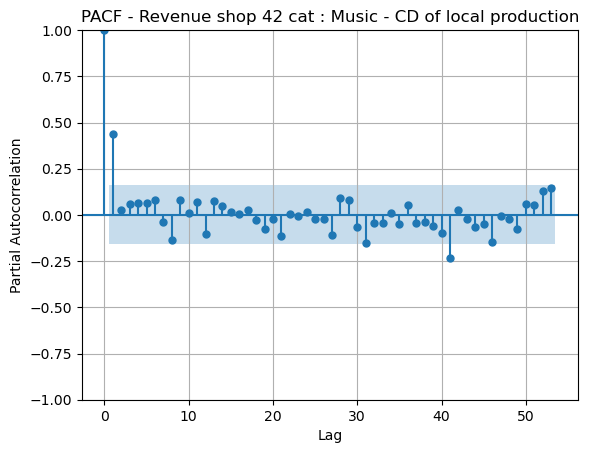

In [18]:
# ------------------------------PACF-----------------------------------#
shops = df_final["shop_id"].unique()
categories = df_final["item_category_name"].unique()
for shop, cat in product(shops, categories):
    df_plt = df_final[
        (df_final["shop_id"] == shop) & (df_final["item_category_name"] == cat)
    ].copy()
    if df_plt.empty:
        continue
    ts = (
        df_plt.groupby("week_id", as_index=False)
        .agg(
            {
                "date": "first",
                "Revenue": "sum",
            }
        )
        .sort_values(by="week_id")
    )
    plot_pacf(ts["Revenue"], lags=53, method="ywm")
    plt.title(f"PACF - Revenue shop {shop} cat : {cat.strip()}")
    plt.xlabel("Lag")
    plt.ylabel("Partial Autocorrelation")
    plt.grid()
    plt.show()

In [19]:
folder_path = "C:/Users/LENOVO/Desktop/Sales Forecasing/data/processed"
file_path= os.path.join(folder_path, "df_final.pkl")
# Save the df to  a pikle file
os.makedirs(folder_path,exist_ok=True)
jl.dump(df_final, file_path)

['C:/Users/LENOVO/Desktop/Sales Forecasing/data/processed\\df_final.pkl']